# Project: Predicting Bike Rentals 

In many American cities, there are communal bicycle sharing stations where you can rent bicycles by the hour or by the day. Washington, D.C. is one of these cities, and has detailed data available about how many bicycles were rented by hour and by day.

## Data Exploration

In this project, we'll try to predict the total number of bikes rented in a given hour. To do this, we'll create a few different machine learning models and evaluate their performance.

In [31]:
import pandas as pd
import numpy as np 

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

bike_rentals = pd.read_csv('bike_rental_hour.csv')
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [32]:
bike_rentals.shape

(17379, 17)

The file contains 17380 rows, and each row represents the bike rentals in a single hour of a single day. 

Here are explanations of the relevant columns:

- instant -- a unique sequential id number for each row.
- dteday -- the date the rentals occurred on.
- season -- the season the rentals occurred in.
- yr -- the year the rentals occurred in.
- mnth -- the month the rentals occurred in.
- hr -- the hour the rentals occurred in.
- holiday -- whether or not the day was a holiday.
- weekday -- whether or not the day was a weekday.
- workingday -- whether or not the day was a working day.
- weathersit -- the weather situation (categorical variable).
- temp -- the temperature on a 0-1 scale.
- atemp -- the adjusted temperature.
- hum -- the humidity on a 0-1 scale.
- windspeed -- the wind speed on a 0-1 scale.
- casual -- the number of casual riders (people who hadn't previously signed up with the bikesharing program) that rented bikes.
- registered -- the number of registered riders (people who signed up previously) that rented bikes.
- cnt -- the total number of bikes rented (casual + registered).

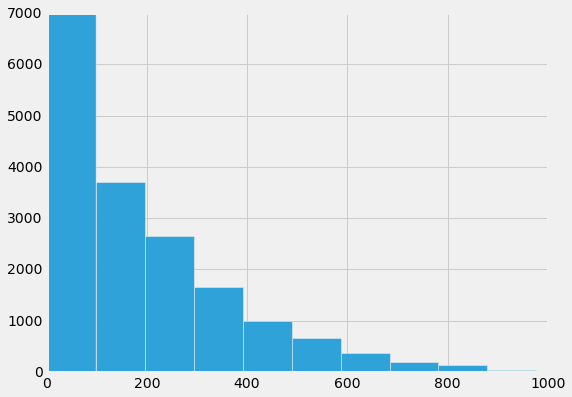

In [33]:
plt.figure(figsize=(8,6))
plt.hist(bike_rentals['cnt'])
plt.show()

In [34]:
bike_rentals.corr()['cnt']

instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

## Calculating Features
It can often be helpful to calculate features before applying machine learning models. Features can enhance the accuracy of models by introducing new information, or distilling existing information.

For example, the hr column in bike_rentals contains hours that bikes are rented, from 1 to 24. A machine will treat each hour differently, and not understand that certain hours are related. We can introduce some order into this by creating a new column with labels for morning, afternoon, evening, and night. This will bundle up similar times together, and enable the model to make better decisions.

In [35]:
def assign_label(hour):
    if hour >=0 and hour < 6:
        return 4
    elif hour >=6 and hour < 12:
        return 1
    elif hour >= 12 and hour < 18:
        return 2
    elif hour >= 18 and hour <=24:
        return 3

bike_rentals["time_label"] = bike_rentals["hr"].apply(assign_label)

## Train/Test Split
Before we can start applying machine learning algorithms, we'll need to split the data into training and testing sets. This will enable us to train an algorithm using the training set and evaluate its accuracy on the testing set. If we train an algorithm on the training data, and evaluate its performance on the same data, we can get an unrealistically low error value, due to overfitting.

In [36]:
train = bike_rentals.sample(frac=.8)

In [37]:
test = bike_rentals.loc[~bike_rentals.index.isin(train.index)]

## Applying Linear Regression
Now that we've done some data exploration and manipulation, we're ready to apply linear regression to the data. Linear regression will likely work fairly well on this data, given that many of the columns are highly correlated with cnt.

As we know, linear regression works best when predictors are linearly correlated to the target, and when predictors are independent, and don't change meaning when combined with each other. The good thing about linear regression is that it is fairly resistant to overfitting because it is simple, but it also can be prone to underfitting the data, and not building a powerful enough model. This means that linear regression usually isn't the most accurate option.

We'll need to ignore the casual and registered columns because cnt is derived from these columns. If we're trying to predict the number of people who rent bikes in a given hour (cnt), it doesn't make sense that we would already know casual or registered, because those numbers are added together to get cnt.

In [38]:
predictors = list(train.columns)
predictors.remove('cnt')
predictors.remove('casual')
predictors.remove('registered')
predictors.remove('dteday')

reg = LinearRegression()
reg.fit(train[predictors], train['cnt'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Error metric
The mean squared error metric makes the most sense to evaluate our error. MSE works on continuous numeric data, which fits our data quite well.

In [39]:
predictions = reg.predict(test[predictors])

np.mean((predictions - test['cnt']) ** 2)

17800.226515887818

In [41]:
test['cnt']

9         14
12        84
38        74
48         2
53       154
62       157
65        52
68        12
73         4
75        94
76       179
79        57
83        65
84        83
86       182
91        11
92         6
99       195
111       89
114       19
132      163
134       69
142        5
143       34
146      134
151       50
157       51
174      102
175       95
176       74
        ... 
17236      7
17239      2
17241     36
17249     20
17252     53
17260      5
17271    109
17273    119
17274    120
17275    174
17277    197
17278    117
17285      5
17287      4
17290    112
17291    239
17293    162
17297    261
17305     62
17309     19
17311      3
17313      7
17317     41
17321     98
17322    129
17325    110
17331     41
17333     19
17347    133
17361     40
Name: cnt, dtype: int64

The error is very high, which may be due to the fact that the data has a few extremely high rental counts, but otherwise mostly low counts. Larger errors are penalized more with MSE, which leads to a higher total error.

## Applying Decision Trees
We're now ready to apply the decision tree algorithm. We'll be able to compare the error with the error from linear regression, which will enable us to pick the right algorithm for this dataset.

Decision trees tend to predict outcomes much more reliably than linear regression. Because decision trees are a fairly complex model, they also tend to overfit, particularly when parameters such as maximum depth and minimum number of samples per leaf aren't tweaked. Decision trees are also prone to instability -- small changes in the input data can result in a very different output model.

In [42]:
reg = DecisionTreeRegressor(min_samples_leaf = 5)
reg.fit(train[predictors], train['cnt'])

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [43]:
predictions = reg.predict(test[predictors])

np.mean((predictions - test['cnt']) ** 2)

2509.5033231478124

In [29]:
reg = DecisionTreeRegressor(min_samples_leaf=2)

reg.fit(train[predictors], train['cnt'])

predictions = reg.predict(test[predictors])

np.mean((predictions - test['cnt']) ** 2)

2718.2961178238043

By taking the nonlinear predictors into account, the decision tree regressor appears to have much higher accuracy than linear regression.

## Applying Random Forests
You can now apply the random forest algorithm, which improves on the decision tree algorithm. Random forests tend to be much more accurate than simple models like linear regression. Because of how random forests are constructed, they tend to overfit much less than decision trees. Random forests can still be prone to overfitting, though, and tuning parameters such as maximum depth and minimum samples per leaf is important.

In [45]:
reg = RandomForestRegressor(min_samples_leaf=5)
reg.fit(train[predictors], train['cnt'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=5,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [47]:
predictions = reg.predict(test[predictors])

np.mean((predictions - test["cnt"]) ** 2)

1967.370044584808

By removing some of the sources of overfitting, the random forest accuracy is improved over the decision tree accuracy.

## Ideas for Extra Exploration
Calculate more features, such as:
   - An index combining temperature, humidity, and wind speed.
   
Try predicting casual and registered instead of cnt.